In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "C:/Users/sarah/Desktop/SMDA201811DATA2/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "C:/Users/sarah/Desktop/SMDA201811DATA2/02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## 1 Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = combined_data.groupby(["Drug", "Timepoint"])
tumor_mean = grouped_data["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_response_df = pd.DataFrame(tumor_mean)
# preview dataframe
tumor_response_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tumor = grouped_data["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
sem_tumor_df = pd.DataFrame(standard_error_tumor)
# Preview DataFrame
sem_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_tumor = tumor_response_df.unstack(0)
reformatted_tumor_sem = sem_tumor_df.unstack(0)
# Preview that Reformatting worked
reformatted_tumor

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

Text(0,0.5,'Tumor Volume (mm3)')

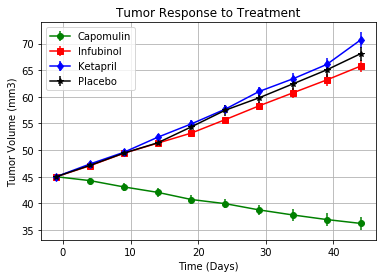

In [5]:
# Generate the Plot (with Error Bars)
#set graph variables
x_axis = np.arange(-1, 47, 5)
capomulin_1 = reformatted_tumor.iloc[:,0]
infubinol_1 = reformatted_tumor.iloc[:,2]
ketapril_1 = reformatted_tumor.iloc[:,3]
placebo_1 = reformatted_tumor.iloc[:,5]

#error bars
capomulin_1_sem = reformatted_tumor_sem.iloc[:,0]
infubinol_1_sem = reformatted_tumor_sem.iloc[:,2]
ketapril_1_sem = reformatted_tumor_sem.iloc[:,3]
placebo_1_sem = reformatted_tumor_sem.iloc[:,5]

#print unique lines for each drug
capomulin_tumor = plt.errorbar(x_axis, capomulin_1, capomulin_1_sem, marker="o", color="green", label="Capomulin")
infubinol_tumor = plt.errorbar(x_axis, infubinol_1, infubinol_1_sem, marker="s", color="red", label="Infubinol")
ketapril_tumor = plt.errorbar(x_axis, ketapril_1, ketapril_1_sem, marker="d", color="blue", label="Ketapril")
placebo_tumor = plt.errorbar(x_axis, placebo_1, placebo_1_sem, marker="*", color="black", label="Placebo")

#aesthetics & titles 
plt.grid()
plt.legend(loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure


In [6]:
# Show the Figure
plt.show()

## 2 Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_data2 = combined_data.groupby(["Drug", "Timepoint"])
metastatic_mean = grouped_data2["Metastatic Sites"].mean()
# Convert to DataFrame
metastatic_response_df = pd.DataFrame(metastatic_mean)
# Preview DataFrame
metastatic_response_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_metastatic = grouped_data["Metastatic Sites"].sem()
# Convert to DataFrame
sem_metastatic_df = pd.DataFrame(standard_error_metastatic)
# Preview DataFrame
sem_metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_metastatic = metastatic_response_df.unstack(0)
reformatted_metastatic_sem = sem_metastatic_df.unstack(0)
# Preview that Reformatting worked
reformatted_metastatic_sem

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25                0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30                0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35                0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40                0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45                0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

Text(0,0.5,'Metastatic Sites')

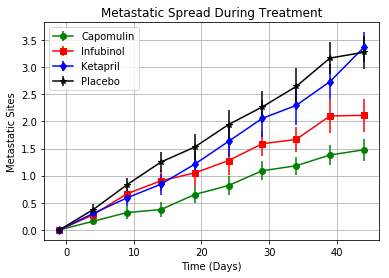

In [10]:
# Generate the Plot (with Error Bars)

#variables 
x_axis = np.arange(-1, 47, 5)
capomulin_2 = reformatted_metastatic.iloc[:,0]
infubinol_2 = reformatted_metastatic.iloc[:,2]
ketapril_2 = reformatted_metastatic.iloc[:,3]
placebo_2 = reformatted_metastatic.iloc[:,5]

#error bars
capomulin_2_sem = reformatted_metastatic_sem.iloc[:,0]
infubinol_2_sem = reformatted_metastatic_sem.iloc[:,2]
ketapril_2_sem = reformatted_metastatic_sem.iloc[:,3]
placebo_2_sem = reformatted_metastatic_sem.iloc[:,5]

#unique lines
capomulin_tumor = plt.errorbar(x_axis, capomulin_2, capomulin_2_sem, marker="o", color="green", label="Capomulin")
infubinol_tumor = plt.errorbar(x_axis, infubinol_2, infubinol_2_sem, marker="s", color="red", label="Infubinol")
ketapril_tumor = plt.errorbar(x_axis, ketapril_2, ketapril_2_sem, marker="d", color="blue", label="Ketapril")
placebo_tumor = plt.errorbar(x_axis, placebo_2, placebo_2_sem, marker="*", color="black", label="Placebo")

#aesthetics & titles
plt.grid()
plt.legend(loc="best")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")

# Save the Figure

# Show the Figure


## 3 Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_data3 = combined_data.groupby(["Drug", "Timepoint"])
survival_count = grouped_data3["Mouse ID"].count()
# Convert to DataFrame
survival_rate_df = pd.DataFrame(survival_count)
# Preview DataFrame
survival_rate_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_survival = survival_rate_df.unstack(0)
# Preview the Data Frame
reformatted_survival

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

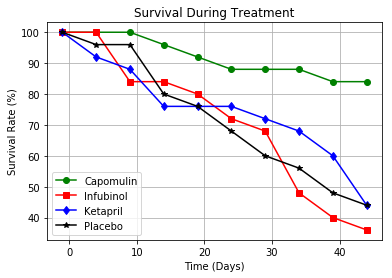

In [13]:
# Generate the Plot (Accounting for percentages)
#graph variables
x_axis = np.arange(-1, 47, 5)
capomulin_3 = (reformatted_survival.iloc[:,0] / 25) * 100
infubinol_3 = (reformatted_survival.iloc[:,2] / 25) * 100
ketapril_3 = (reformatted_survival.iloc[:,3] / 25) * 100
placebo_3 = (reformatted_survival.iloc[:,5] / 25) * 100

# Save the Figure
capomulin_survival = plt.plot(x_axis, capomulin_3, marker="o", color="green", label="Capomulin")
infubinol_survival = plt.plot(x_axis, infubinol_3, marker="s", color="red", label="Infubinol")
ketapril_survival = plt.plot(x_axis, ketapril_3, marker="d", color="blue", label="Ketapril")
placebo_survival = plt.plot(x_axis, placebo_3, marker="*", color="black", label="Placebo")


#aesthetics 
plt.grid()
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Show the Figure
plt.show()

## 4 Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
final_volume = reformatted_tumor.iloc[0,]
start_volume = reformatted_tumor.iloc[9,]
percent_change = (start_volume - final_volume) / final_volume * 100
# Display the data to confirm_volume
percent_change

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

([<matplotlib.axis.XTick at 0x1b48a6ff198>,
 <a list of 4 Text xticklabel objects>)

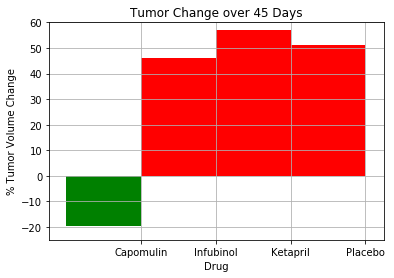

In [15]:
# Store all Relevant Percent Changes into a Tuple
drug = ("Capomulin", "Infubinol", "Ketapril", "Placebo")
percent_changes = (-19.475303, 46.123472, 57.028795, 51.297960)
x_axis = np.arange(len(percent_changes))

# Splice the data between passing and failing drugs
plt.bar(x_axis, percent_changes, width=-1, align="edge", color=['green', 'red', 'red', 'red', 'red'])

# Orient widths. Add labels, tick marks, etc. 
plt.grid()
plt.xlim(-1.23,3.25)
plt.ylim(-25, 60)
plt.title("Tumor Change over 45 Days")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug)


FINAL OBSERVATIONS:
Of the four treatments observed, Capomulin won out in all categories; of the four compared it was the only which showed an average decrease in tumor volume. It also had the highest rate of survival, and was the best at preventing metastatic spread. None of the drugs tested (graphed) were able to completely prevent metastatic spread; the standard errors of each treatment kept most of the data within a pretty set range for all of the drugs involved. More research should be done on how to stop metastatic spread.

QUESTIONS:
1) Were any of the rats fully cured of cancer at the end of 45 days? 
2) How do 45 days scale on treatments in rats vs treatments in humans? What I mean by that is: if this were taken to a human clinical trial, would the timeframe be kept the same?
3) Would these rates of metastatic spread, tumor volume, and survivability stay the same if time and treatment continued or would they plateau at some point?